In [1]:
import librosa
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import soundfile as sf

ValueError: Input could not be cast to an at-least-1D NumPy array

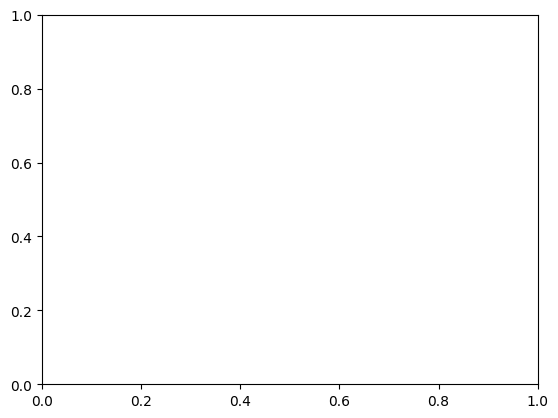

In [12]:
plt.plot(sig)

In [168]:
from scipy import signal
sig, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA2r09\p03\d307\d307sA2r09p0320210825.wav", sr=48000)
sig_noise, sr = librosa.load("C:\\Users\Alec\Desktop\GE_Mod_Intern_Workshop\WorkBench_2024\DataStores\Acoustic\AnechoicChamber_stuff\\audio\PHANTOM4-FT-B-3242_20191126.wav", sr=48000, duration=15.0)

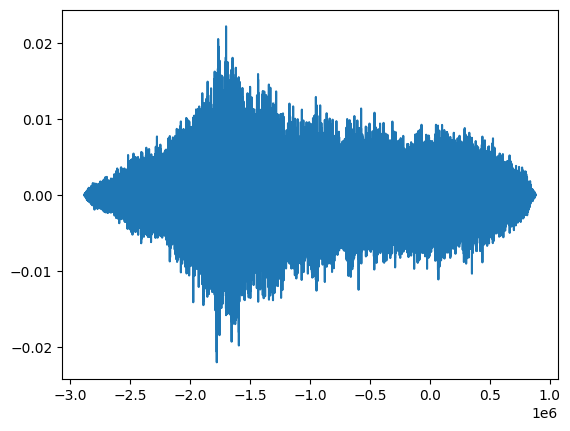

In [62]:
from scipy.signal import correlate
def plot_xcorr(x, y): 
    "Plot cross-correlation (full) between two signals."
    N = max(len(x), len(y)) 
    n = min(len(x), len(y)) 

    if N == len(y): 
        lags = np.arange(-N + 1, n) 
    else: 
        lags = np.arange(-n + 1, N) 
    c = correlate(x / np.std(x), y / np.std(y), 'full') 

    plt.plot(lags, c / n) 
    plt.show() 

    return c

c = plot_xcorr(sig_noise, sig)

C:\Users\Alec\AppData\Local\Temp\ipykernel_3084\3409646347.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


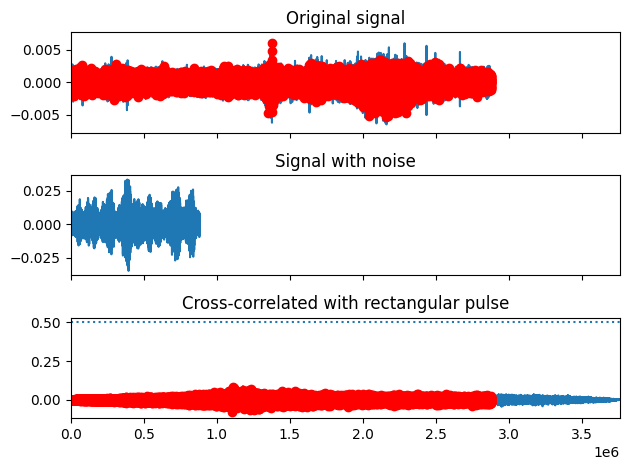

In [53]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

In [67]:
c= np.correlate(sig, sig_noise, "full")

In [76]:
sig_noise.shape

(885072,)

In [68]:
# sf.write(f"C:\\Users\Alec\Desktop\correlation.wav", c, samplerate=48000)

In [83]:
def compute_fft(sig):
    window = np.hamming(len(sig))
    sig = sig * window
    fft = np.fft.fft(sig)
    freq = np.fft.fftfreq(len(sig), d=1/fs)
    fft_mag = np.abs(fft)
    fft_mag_normalized = fft_mag / np.max(fft_mag)  # Normalize to max amplitude
    
    return freq, fft_mag_normalized

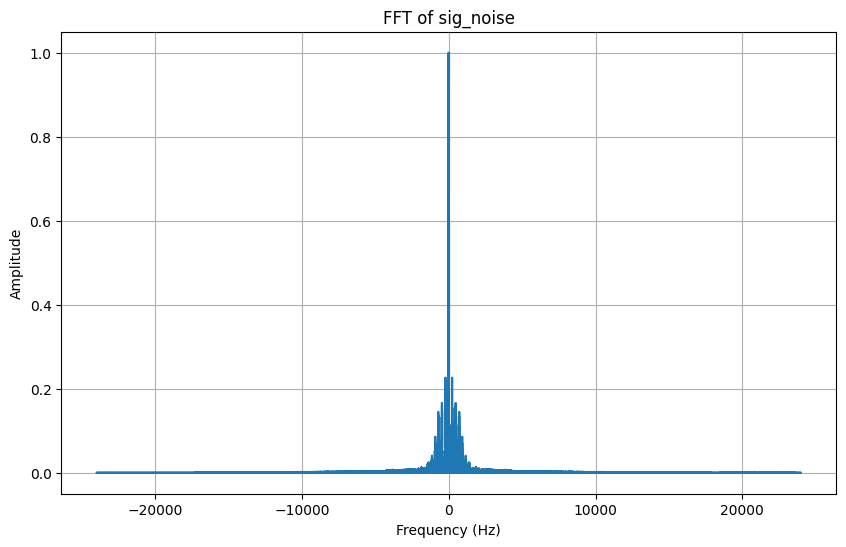

In [84]:
fft_freq, fft_noise = compute_fft(sig_noise)

# Plot FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, np.abs(fft_noise))
plt.title('FFT of sig_noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

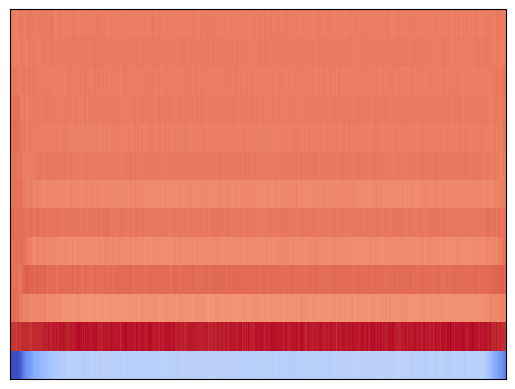

In [87]:
mfcc = librosa.feature.mfcc(y=sig_noise, sr=sr, n_mfcc=13)
librosa.display.specshow(mfcc)
plt.show()

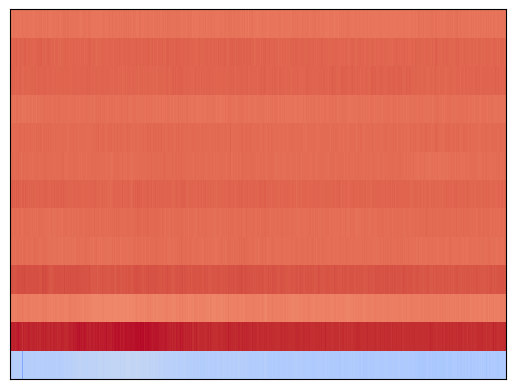

In [88]:
mfcc = librosa.feature.mfcc(y=sig, sr=sr, n_mfcc=13)
librosa.display.specshow(mfcc)
plt.show()

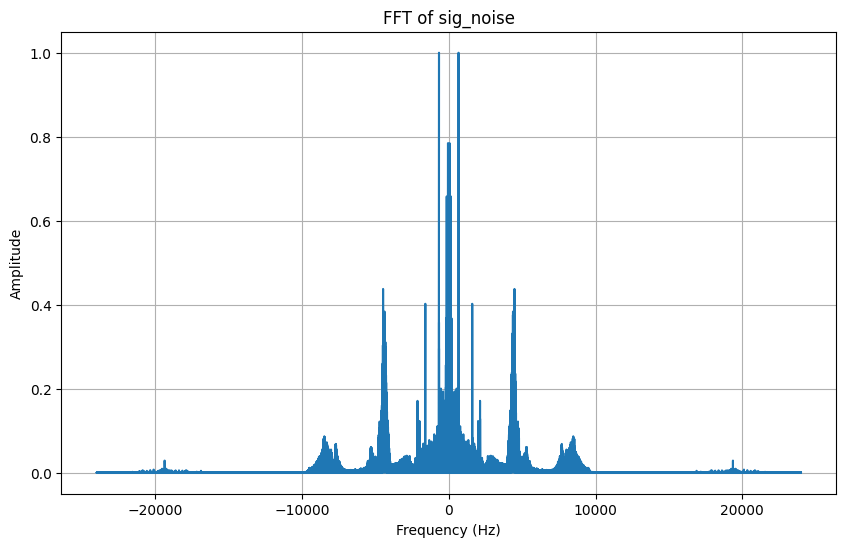

In [85]:
fft_freq, fft_noise = compute_fft(sig)

# Plot FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, np.abs(fft_noise))
plt.title('FFT of sig_noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [114]:
mfccs_noise[:4].shape

(4, 1729)

In [169]:
sr = 48000  # Sample rate, adjust as necessary
mfccs_noise = librosa.feature.mfcc(y=sig_noise, sr=sr, n_mfcc=13)

# Step 2: Divide sig into 15-second chunks
duration_chunk = 15  # Duration of each chunk in seconds
num_chunks = int(np.ceil(len(sig) / (sr * duration_chunk)))  # Calculate number of chunks

# Step 3: Compute MFCCs for each chunk of sig and compare with mfccs_noise using SSIM
similarities = []

for i in range(num_chunks):
    # Calculate start and end indices for each chunk
    start = i * sr * duration_chunk
    end = min((i + 1) * sr * duration_chunk, len(sig))
    
    # Extract chunk from sig
    sig_chunk = sig[start:end]
    
    # Compute MFCCs for the chunk
    mfccs_chunk = librosa.feature.mfcc(y=sig_chunk, sr=sr, n_mfcc=13)
    
    # Resize and normalize MFCC arrays for SSIM calculation
    mfccs_noise_resized = np.resize(mfccs_noise, mfccs_chunk.shape)  # Resize to match chunk size if necessary
    mfccs_noise_norm = (mfccs_noise_resized - np.min(mfccs_noise_resized)) / (np.max(mfccs_noise_resized) - np.min(mfccs_noise_resized))
    mfccs_chunk_norm = (mfccs_chunk - np.min(mfccs_chunk)) / (np.max(mfccs_chunk) - np.min(mfccs_chunk))
    
    # Calculate SSIM between mfccs_noise_norm and mfccs_chunk_norm
    try:
        similarity = ssim(mfccs_noise_norm, mfccs_chunk_norm, data_range = mfccs_noise_norm.max() - mfccs_noise_norm.min())
    except:
        print(mfccs_chunk_norm.shape)
    similarities.append(similarity)

    # Optionally, you can print or store the similarity for each chunk
    print(f"SSIM for chunk {i+1}: {similarity}")

# Optionally, you can average the similarities for all chunks
average_similarity = np.mean(similarities)
print(f"Average SSIM across all chunks: {average_similarity}")

SSIM for chunk 1: 0.663951228654894
SSIM for chunk 2: 0.6822753914260494
SSIM for chunk 3: 0.6921434418328788
SSIM for chunk 4: 0.6859880038858542
(13, 1)
SSIM for chunk 5: 0.6859880038858542
Average SSIM across all chunks: 0.6820692139371062


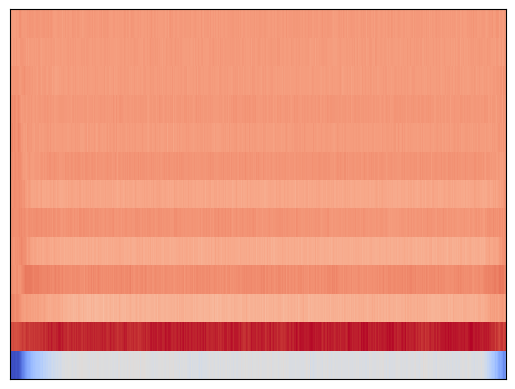

In [133]:
librosa.display.specshow(mfccs_noise,sr=48000)

In [139]:
mfccs_chunk.shape

(13, 563)

In [141]:
mfccs_noise.shape

(13, 1729)

In [140]:
from skimage.metrics import structural_similarity as ssim
ssim_none = ssim(mfccs_noise, mfccs_chunk, data_range=mfccs_noise.max() - mfccs_noise.min())

ValueError: Input images must have the same dimensions.

SSIM between Anechoic Segment 1 and Real-world Segment 1: 0.833572206457122
SSIM between Anechoic Segment 1 and Real-world Segment 2: 0.8368619378073877
SSIM between Anechoic Segment 1 and Real-world Segment 3: 0.8309667956027664
SSIM between Anechoic Segment 1 and Real-world Segment 4: 0.822593754139267
SSIM between Anechoic Segment 1 and Real-world Segment 5: 0.8347576021446901
SSIM between Anechoic Segment 1 and Real-world Segment 6: 0.8171350310129278
SSIM between Anechoic Segment 1 and Real-world Segment 7: 0.8243304273360917
SSIM between Anechoic Segment 1 and Real-world Segment 8: 0.8177488690264085
SSIM between Anechoic Segment 1 and Real-world Segment 9: 0.8097243733666524
SSIM between Anechoic Segment 1 and Real-world Segment 10: 0.8035057754576707
SSIM between Anechoic Segment 1 and Real-world Segment 11: 0.8120282865171673
SSIM between Anechoic Segment 1 and Real-world Segment 12: 0.824184119691368
SSIM between Anechoic Segment 2 and Real-world Segment 1: 0.8002656803812299

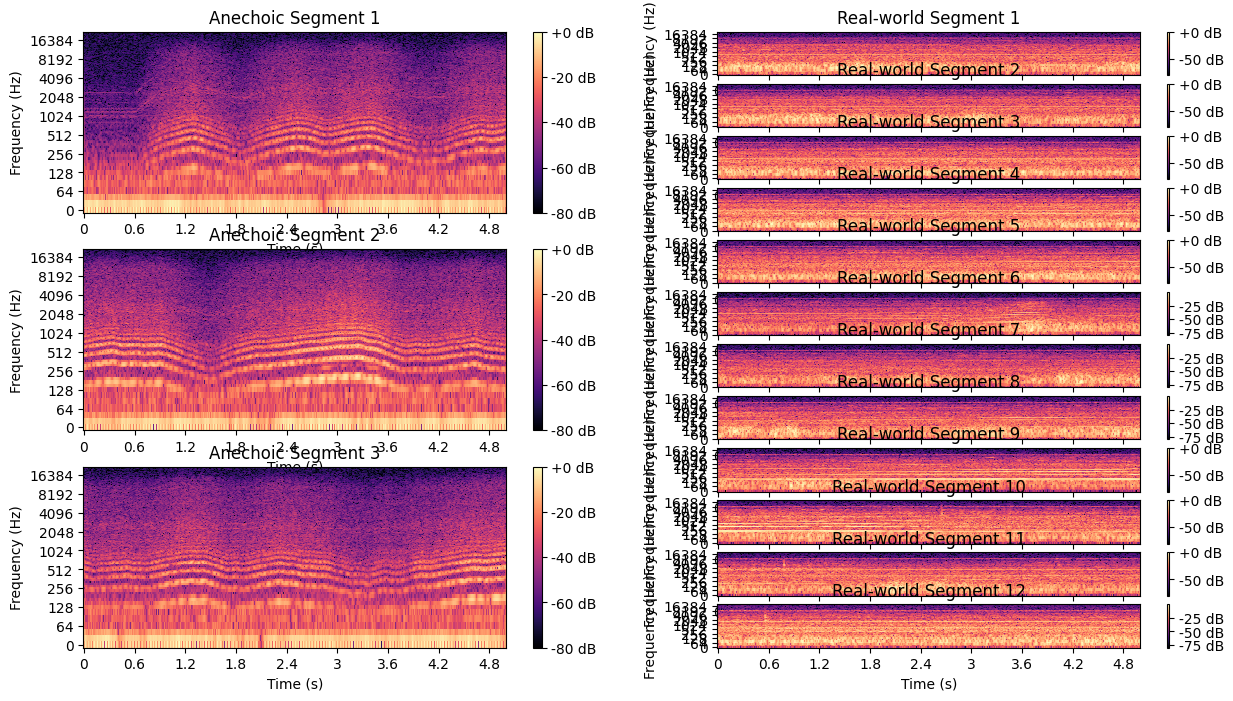

In [188]:
from scipy import signal
real_world, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA2r05\p03\d306\d306sA2r05p0320210826.wav", sr=44100)
anechoic, sr = librosa.load("C:\\Users\Alec\Desktop\GE_Mod_Intern_Workshop\WorkBench_2024\DataStores\Acoustic\AnechoicChamber_stuff\\audio\PHANTOM4-HT-A-3222_20191126.wav", sr=44100)

sr = 44100  # Sample rate, adjust as necessary
# Parameters
duration_segment = 5  # Duration of each segment in seconds
num_segments_anechoic = len(anechoic) // (sr * duration_segment)
num_segments_real_world = len(real_world) // (sr * duration_segment)

# Compute MFCCs for each segment
mfccs_anechoic_segments = []
mfccs_real_world_segments = []

for i in range(num_segments_anechoic):
    # Calculate start and end indices for each segment
    start_anechoic = i * sr * duration_segment
    end_anechoic = min((i + 1) * sr * duration_segment, len(anechoic))
    
    # Extract segment from anechoic
    anechoic_segment = anechoic[start_anechoic:end_anechoic]
    
    # Compute MFCCs for the segment
    mfccs_anechoic_segment = librosa.feature.mfcc(y=anechoic_segment, sr=sr, n_mfcc=13)
    mfccs_anechoic_segments.append(mfccs_anechoic_segment)

for j in range(num_segments_real_world):
    # Calculate start and end indices for each segment
    start_real_world = j * sr * duration_segment
    end_real_world = min((j + 1) * sr * duration_segment, len(real_world))
    
    # Extract segment from real_world
    real_world_segment = real_world[start_real_world:end_real_world]
    
    # Compute MFCCs for the segment
    mfccs_real_world_segment = librosa.feature.mfcc(y=real_world_segment, sr=sr, n_mfcc=13)
    mfccs_real_world_segments.append(mfccs_real_world_segment)

# Calculate SSIM between each pair of segments and collect similarity scores
ssim_scores = []

# Compare each segment of anechoic with each segment of real_world
for i in range(num_segments_anechoic):
    mfccs_anechoic = mfccs_anechoic_segments[i]
    ssim_scores_segment = []
    
    for j in range(num_segments_real_world):
        mfccs_real_world = mfccs_real_world_segments[j]
        
        # Resize and normalize MFCC arrays for SSIM calculation
        mfccs_anechoic_resized = np.resize(mfccs_anechoic, mfccs_real_world.shape)
        mfccs_anechoic_norm = (mfccs_anechoic_resized - np.min(mfccs_anechoic_resized)) / (np.max(mfccs_anechoic_resized) - np.min(mfccs_anechoic_resized))
        mfccs_real_world_norm = (mfccs_real_world - np.min(mfccs_real_world)) / (np.max(mfccs_real_world) - np.min(mfccs_real_world))
        
        # Calculate SSIM between mfccs_anechoic_norm and mfccs_real_world_norm
        similarity = ssim(mfccs_anechoic_norm, mfccs_real_world_norm, data_range = mfccs_anechoic_norm.max() - mfccs_anechoic_norm.min())
        ssim_scores_segment.append(similarity)
        
        # Print SSIM result for the current comparison
        print(f"SSIM between Anechoic Segment {i+1} and Real-world Segment {j+1}: {similarity}")
    
    # Calculate mean SSIM score for the current segment of anechoic
    mean_ssim_segment = np.mean(ssim_scores_segment)
    ssim_scores.append(mean_ssim_segment)

# Use mean SSIM scores for thresholding
mean_ssim_scores = np.array(ssim_scores)
threshold = 0.75  # Adjust threshold based on application

# Identify segments with high SSIM scores as potential drone signals
drone_segments = [idx for idx, score in enumerate(ssim_scores) if score > threshold]

print(f"Number of drone segments: {len(drone_segments)}")
print("Drone segments indices:", drone_segments)

# Optionally, you can plot spectrograms for visualization

# Plot spectrograms for each segment (optional)
plt.figure(figsize=(15, 8))

# Plot spectrograms for anechoic segments
for i in range(num_segments_anechoic):
    # Calculate start and end indices for each segment
    start_anechoic = i * sr * duration_segment
    end_anechoic = min((i + 1) * sr * duration_segment, len(anechoic))
    
    # Extract segment from anechoic
    anechoic_segment = anechoic[start_anechoic:end_anechoic]
    
    # Compute spectrogram for the segment
    S_anechoic = np.abs(librosa.stft(anechoic_segment))
    
    # Plot spectrogram
    plt.subplot(num_segments_anechoic, 2, 2*i+1)
    librosa.display.specshow(librosa.amplitude_to_db(S_anechoic, ref=np.max), sr=sr, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Anechoic Segment {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

# Plot spectrograms for real_world segments
for j in range(num_segments_real_world):
    # Calculate start and end indices for each segment
    start_real_world = j * sr * duration_segment
    end_real_world = min((j + 1) * sr * duration_segment, len(real_world))
    
    # Extract segment from real_world
    real_world_segment = real_world[start_real_world:end_real_world]
    
    # Compute spectrogram for the segment
    S_real_world = np.abs(librosa.stft(real_world_segment))
    
    # Plot spectrogram
    plt.subplot(num_segments_real_world, 2, 2*j+2)
    librosa.display.specshow(librosa.amplitude_to_db(S_real_world, ref=np.max), sr=sr, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Real-world Segment {j+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

plt.show()

In [198]:
# Function to extract features (e.g., MFCCs) from audio
def extract_features(audio_data, sr):
    # Example: Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
    return mfccs

# Function to calculate correlation between features
def calculate_correlation(features_anechoic, features_real_world):
    # Calculate correlation (e.g., Pearson correlation coefficient)
    correlation = np.corrcoef(features_anechoic.flatten(), features_real_world.flatten())[0, 1]
    return correlation

# Example usage
def classify_segments(real_world_audio_path, anechoic_audio_path):
    # Load audio files
    audio_real_world, sr_real_world = librosa.load(real_world_audio_path, sr=44100, duration=15.0)
    audio_anechoic, sr_anechoic = librosa.load(anechoic_audio_path, sr=44100, duration=15.0)
    
    # Extract features
    features_real_world = extract_features(audio_real_world, sr_real_world)
    features_anechoic = extract_features(audio_anechoic, sr_anechoic)
    
    # Calculate correlation between features
    correlation = calculate_correlation(features_anechoic, features_real_world)
    print(correlation)
    
    # Define a threshold for classification
    threshold = 0.7  # Example threshold (adjust as needed)
    
    # Classification based on correlation
    if correlation >= threshold:
        print("Drone present")
    else:
        print("No drone")

# Example usage
real_world_audio_path = "C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA1r01\p03\d328\d328sA1r01p0320210823.wav"
anechoic_audio_path = "C:\\Users\Alec\Desktop\GE_Mod_Intern_Workshop\WorkBench_2024\DataStores\Acoustic\AnechoicChamber_stuff\\audio\DJIS1000LOUD-LR-B-609_20191126.wav"
classify_segments(real_world_audio_path, anechoic_audio_path)

0.969371729763918
Drone present


In [189]:
real_world, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA2r05\p03\d306\d306sA2r05p0320210826.wav", sr=44100)
anechoic, sr = librosa.load("C:\\Users\Alec\Desktop\GE_Mod_Intern_Workshop\WorkBench_2024\DataStores\Acoustic\AnechoicChamber_stuff\\audio\PHANTOM4-HT-A-3222_20191126.wav", sr=44100)